In [17]:
from sympy import *
from sympy.functions import sqrt
from sympy import symbols
from sympy.physics.quantum.dagger import Dagger
from sympy.physics.quantum.state import Ket, Bra
from sympy.physics.quantum.operator import Operator


from sympy import init_printing
init_printing() 

a, b, c, L, n = symbols("a b c L n")

A, B, C, x, y, z, psi = symbols("A B C x y z psi")

def Conj(x):
    return x.replace(I, -I)

def Norm(A, x, y, z):
    return 1/sqrt(Integral(A*Conj(A), (x, y, z)))

def Expect(A, B, x, y, z):
    return Integral(A*Operator(B)*Operator(Conj(A)), (x, y, z))

Let's discuss what the above definition means:

An expectation value is the average value of a normalized function over an integral.

A = the wavefunction (generally denoted by psi)
B = the average value you are looking at
x = the variable that the integration is with respect to
y = the lower bound of integration
z = the upper bound of integration

So, a general expression would be:

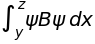

In [18]:
Expect(psi, B, x, y, z)

Note that the second A variable is the complex conjugate, but is not explicitly shown as such, since:

Conj(psi) = psi

# Particle in a Box

We can, in theory, use the above notation to examine the particle in a box problem:

PiB() function is just the particle in a box function

PiB_Norm() function is the normalized particle in a box function

In [19]:
def PiB(x, L, n):
    return sin((n*pi*x)/L)

def PiB_Norm(x, L, n):
    return sqrt(2/L)*PiB(x, L, n)

We are looking for the average location (x) of the particle in a one-dimensional box:

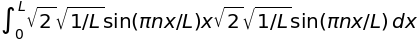

⎧           ___                   ___                     ___                
⎪          ╱ 1                   ╱ 1                     ╱ 1   2             
⎪  √2⋅L⋅  ╱  ─ ⋅cos(π⋅n)⋅L⋅√2⋅  ╱  ─ ⋅sin(π⋅n)   √2⋅L⋅  ╱  ─ ⋅0              
⎪       ╲╱   L                ╲╱   L                  ╲╱   L          π⋅n    
⎨- ─────────────────────────────────────────── + ───────────────  for ─── ≠ 0
⎪                      π⋅n                             π⋅n             L     
⎪                                                                            
⎪                               0                                  otherwise 
⎩                                                                            

In [22]:
psi = PiB_Norm(x, L, n)

display(Expect(psi, x, x, 0, L))
display(Expect(psi, x, x, 0, L).doit())

However, this is an incorrect computation for the particle in a box. The correct expectation value is:

2/L

Indicating the most probable location for finding the particle is in the center of the box.